UNIVERSIDADE FEDERAL DE MINAS GERAIS - UFMG 
ESCOLA DE CIÊNCIA DA INFORMAÇÃO – ECI 
PROGRAMA DE PÓS-GRADUAÇÃO EM GESTÃO & ORGANIZAÇÃO DO CONHECIMENTO
DISCIPLINA: Tópicos Especiais em GET II: Representações Distribuídas de Texto e Modelagem de Tópicos 
DOCENTE: Prof. Renato Rocha de Souza / Prof. Mauricio Barcellos Almeida / Profa. Renata Maria Abrantes Baracho Porto 
DISCENTE: Maria Aniolly Queiroz Maia

Belo Horizonte, 05 de dezembro de 2017


1 Objetivo geral

Desenvolver uma word cloud a partir das palavras recorrentes nos resumos dos artigos de temática "Usabilidade" disponíveis no indexador Scielo.

2 Objetivos específicos:

• Minerar artigos científicos na temática Usabilidade, no idioma português da Scielo, fazendo uso de Python;

• Capturar os artigos de temática Usabilidade por título, periódico, autor e resumo;

• Criar uma lista de palavras, remover as stop words dessa lista, apresentando a recorrência de cada palavra a partir dos resumos disponíveis nas publicações mineradas;

3 Metodologia

Para efetivação do objetivo proposto, incicialmente foi realizada a mineração dos dados disponíveis na base de dados Scielo, a partir de uma pesquisa ao termo "Usabilidade", no idioma português, no qual foi possível identificar um total de 117 documentos. Posteriormente foi realizada a captura (web crawler) dos seguintes dados: título dos artigos, título dos periódicos, autorias e resumos em português.
Em seguida, foi criada uma lista de palavras a partir da remoção das stop words dos resumos no idioma português. Além disso, foi identificada a recorrência de cada palavra descrita nos resumos, essas palavras foram utilizadas para o desenvolvimento da word cloud. Para alcançar os objetivos propostos, utilizou-se diversas bibliotecas de Python, com destaque para:

BeautifulSoup: Utilizada para extrair dados de arquivos HTML e XML. Funciona com o seu analisador favorito para fornecer maneiras idiomáticas de navegar, pesquisar e modificar a árvore de análise. Geralmente economiza horas ou dias de trabalho do programador;
Pandas: Oferece estruturas de dados de alto desempenho. Essa biblioteca é de fácil de uso, sendo uma grande ferramentas de análise de dados;
Gensim: Tem o objetivo de lidar com grandes coleções de texto, usando streaming de dados e algoritmos incrementais eficientes, o que o diferencia da maioria dos outros pacotes de software científicos que apenas destinam o processamento em lote e na memória;
Matplotlib: Fornece uma API orientada a objetos para incorporar gráficos em aplicativos que usam kits de ferramentas de uso geral;
NLTK: Biblioteca para Processamento de Linguagem Natural (PLN) e Text Analytics, originalmente criada para o ensino de PLN, mas que vem sendo amplamente adotado no desenvolvimento de aplicações de PLN em geral. Trata-se de um kit de ferramentas útil para separar as sentenças em um parágrafo, separar as palavras dentro de cada sentença, reconhecer padrões no texto e criar modelos de classificação que permitam, por exemplo, realizar análise de sentimentos em um conjunto de dados.


4 Dificuldades e limitações

Ao considerar Python como uma linguagem de programação relativamente fácil, se comparada a outras linguagens, tive dificuldades para alcançar os objetivos propostos, principalmente pelo fato de nunca ter trabalhado com uma linguagem de programação, o que exigiu maiores esforços de minha parte, fazendo além do curso sugerido pelo Prof. Renato Rocha, outros cursos online, com destaque para dois suportes que me ajudaram bastante, um minicurso de título "Mineração de Emoção em Textos com Python e NLTK" da empresa Udemy, e o Github de autoria de Bárbara Babosa (@bahbbc).
Vale ressaltar ainda que a disciplina possibilitou que eu aprendesse um pouco acerca dessa relevante área (Mineração de dados) que cresce exponencialmente, exigindo profissionais qualificados para tratar, organizar e disseminar esses dados, e o profissional da informação, deve estar atento e capacitado para atuar nesse contexto. Como sugestão, acredito que a disciplina poderia ter uma carga horária maior com aulas práticas e presenciais, o que ao meu ver, facilitaria o processo de aprendizagem.
Por fim, agradeço pelo desafio e parabenizo os professores envolvidos na construção da disciplina.

In [131]:
# Nessa etapa, foi realizada uma mineração de dados sobre a temática Usabilidade na Biblioteca Digital Scielo. A busca geral retornou um total de 117 documentos.
# Desse total de documentos, foram minerados a partir da atividades de captura (web crawler) os seguintes dados: título, autor, nome do periódico e resumo na idioma portugês.

# Etapa 1: Mineração referente aos títulos dos artigos da temática "Usabilidade".
 
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from requests import get
import time
import unicodedata
import re
import csv
import pandas


def getURLBase(string_busca,quantidade_busca, a_partir, numero_pagina):
    return 'http://search.scielo.org/?q={0}&lang=pt&count={1}&from={2}&output=site&format=summary&lang=pt&page={3}' \
           .format(string_busca, str(quantidade_busca), a_partir, numero_pagina)
   

string_busca = "usabilidade"
quantidade_busca = 100
a_partir = 0
titulos = []
contador = 0

for i in range(1, 3):
    base_url = getURLBase(string_busca,quantidade_busca, a_partir, i)
    a_partir += quantidade_busca + 1
    driver = webdriver.Chrome()
    driver.get(base_url)
    bs_obj = bs(driver.page_source,'html.parser')
    driver.close()

    for elemento in bs_obj.findAll("strong", { "class" : "title" }):
       titulos.append(elemento.text.strip()) 
    
print(titulos)   

['Telenursing manual for providing care to patients using clean intermittent urinary catheterization', 'COMPARISON OF ENDOSCOPIC AND MICROSURGICAL METHODS IN THE TREATMENT OF LUMBAR DISC HERNIATIONS', 'Em questão, a usabilidade do site do INES', 'EVALUACIÓN HEURÍSTICA DE LA USABILIDAD DE SOFTWARE PARA FACILITAR EL USO DEL COMPUTADOR A PERSONAS EN SITUACIÓN DE DISCAPACIDAD MOTRIZ', 'Soporte en línea para niños y adolescentes con enfermedad crónica: una revisión integrativa', 'Fatores que influenciam a interação com a interface do Sistema Eletrônico de Editoração de Revistas (SEER)', 'Qualidade dos sítios Web da Administração Pública Portuguesa', 'Diseño de videojuegos soportados en smartphones a través de patrones de interacción', 'Applicability of a motor rehabilitation system in stroke victims', 'Computerized nursing process in the Intensive Care Unit: ergonomics and usability', 'E-Learning and Simulation on a Pré-Hospital Emergency Course: A Participant’s Perspective', 'MÉTODO DE INC

In [132]:
# Etapa 2: Mineração referente aos títulos das revistas nas quais os artigos foram publicados.
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from requests import get
import time
import unicodedata
import re
import csv
import pandas


def getURLBase(string_busca,quantidade_busca, a_partir, numero_pagina):
    return 'http://search.scielo.org/?q={0}&lang=pt&count={1}&from={2}&output=site&format=summary&lang=pt&page={3}' \
           .format(string_busca, str(quantidade_busca), a_partir, numero_pagina)
   

string_busca = "usabilidade"
quantidade_busca = 100
a_partir = 0
titulos = []
con = 0

for i in range(1, 3):
    base_url = getURLBase(string_busca,quantidade_busca, a_partir, i)
    a_partir += quantidade_busca + 1
    driver = webdriver.Chrome()
    driver.get(base_url)
    bs_obj = bs(driver.page_source,'html.parser')
    driver.close()
    
    for elemento in bs_obj.findAll("div", { "class" : "item" }):
      
       revista = elemento.find("a", {"class": "openJournalInfo"})
       print(revista.string)   
       con += 1
       print(con)
    
   

Escola Anna Nery
1
Coluna/Columna
2
RISTI - Revista Ibérica de Sistemas e Tecnologias de Informação
3
Revista EIA
4
Avances en Enfermería
5
Biblios
6
RISTI - Revista Ibérica de Sistemas e Tecnologias de Informação
7
Entre Ciencia e Ingeniería
8
Fisioterapia em Movimento
9
Revista da Escola de Enfermagem da USP
10
Revista Brasileira de Educação Médica
11
Revista Ingeniería Biomédica
12
RISTI - Revista Ibérica de Sistemas e Tecnologias de Informação
13
Revista de Estudios Sociales
14
Boletim de Ciências Geodésicas
15
Boletim de Ciências Geodésicas
16
Revista Latino-Americana de Enfermagem
17
RAM. Revista de Administração Mackenzie
18
Tourism & Management Studies
19
Revista EAN
20
Revista Brasileira de Linguística Aplicada
21
Revista Ingeniería Biomédica
22
Revista Latino-Americana de Enfermagem
23
Per Musi
24
Production
25
JISTEM - Journal of Information Systems and Technology Management
26
Revista de Odontologia da UNESP
27
Revista Latino-Americana de Enfermagem
28
Revista da Escola de 

In [135]:
# Etapa 3: Mineração da indicação de autoria dos artigos publicados.

from bs4 import BeautifulSoup as bs
from selenium import webdriver
from requests import get
import time
import unicodedata
import re
import csv
import pandas


def getURLBase(string_busca,quantidade_busca, a_partir, numero_pagina):
    return 'http://search.scielo.org/?q={0}&lang=pt&count={1}&from={2}&output=site&format=summary&lang=pt&page={3}' \
           .format(string_busca, str(quantidade_busca), a_partir, numero_pagina)
   

string_busca = "usabilidade"
quantidade_busca = 100
a_partir = 0
titulos = []
con = 0

for i in range(1, 3):
    base_url = getURLBase(string_busca,quantidade_busca, a_partir, i)
    a_partir += quantidade_busca + 1
    driver = webdriver.Chrome()
    driver.get(base_url)
    bs_obj = bs(driver.page_source,'html.parser')
    driver.close()
    
    for elemento in bs_obj.findAll ("div", { "class" : "item" }):
        autor = elemento.find ("div", { "class" : "authors"})
        print(autor.text.strip()) 
             


Souza-Junior, Valtuir Duarte de;                            Mendes, Isabel Amélia Costa;                            Mazzo, Alessandra;                            Santos, Cristiano Alves dos;                            Andrade, Elaine Maria Leite Rangel;                            Godoy, Simone de.
ARESTOV, SERGEY;                            KASHCHEEV, ALEXEY;                            GUSHCHA, ARTEM.
Souza, Francisco José de;                            Hildenbrand, Luci.
Sánchez-Álvarez, Jhon Fernando;                            Zapata-Jaramillo, Carlos Mario;                            Jiménez-Builes, Jovani Alberto.
Mazza, Verônica de Azevedo;                            Lemos, Débora de Sousa;                            Guimarães, Sérgio Luídes;                            Ferreira de Lima, Vanessa;                            Felix, Jorge Vinícius Cestari.
da Rocha, Suzana Francisca;                            Kafure Muñoz, Ivette;                            Vilan Filho, Jayme Leiro.

Bottentuit Junior, João Batista;                            Coutinho, Clara Pereira.
Meirelles, Rodrigo França;                            Machado, Raymundo das Neves.
Ferreira, Simone Bacellar Leal;                            Chauvel, Marie Agnes;                            Silveira, Denis Silva da.
Massukado, Luciana Miyoko;                            Zanta, Viviana Maria.
Costa, Dalberto Dias da;                            Pereira, Athos Gleber.
Rolim, Francisco Juraci;                            Lopes, Marcos Aurélio.
Simão, João Batista;                            Rodrigues, Georgete.
Abrahão, Júlia Issy;                            Silvino, Alexandre Magno Dias;                            Sarmet, Maurício Miranda.
Bohmerwald, Paula.
Torres, Elisabeth Fátima;                            Mazzoni, Alberto Angel.
Silvino, Alexandre Magno Dias;                            Abrahão, Júlia Issy.
Dias, Denise Costa;                            Cassiani, Silvia Helena De Bortoli.
Ferreira, Sim

['Resumo  Objetivo: Elaborar e validar em aparência e conteúdo um manual de telenfermagem para subsidiar o enfermeiro no atendimento ao cliente com bexiga neurogênica, usuário de cateterismo urinário intermitente limpo.  Método: Estudo metodológico sobre a construção e validação de manual de telenfermagem. O manual foi validado em aparência e conteúdo por 11 enfermeiros peritos; para tanto, considerou-se válido cada aspecto do instrumento que atingiu o nível mínimo de concordância de 70% entre os peritos.  Resultados: O manual obteve, para cada aspecto avaliado, os seguintes níveis de concordância - Linguagem: 97%; Conteúdo: 97,7%; e Objetivos, Funcionalidade, Usabilidade e Relevância: 100% cada.  Conclusão: O manual encontra-se disponível para acesso e representa uma iniciativa importante para o campo da telenfermagem no Brasil, auxiliando o enfermeiro na realização do teleatendimento e atendimento ao usuário de cateterismo urinário intermitente limpo.', 'RESUMO  Objetivo: O desenvolv

[['resumo', 'objetivo', 'elaborar', 'validar', 'aparência', 'conteúdo', 'manual', 'telenfermagem', 'subsidiar', 'enfermeiro', 'atendimento', 'cliente', 'bexiga', 'neurogênica', 'usuário', 'cateterismo', 'urinário', 'intermitente', 'limpo', 'mtodo', 'estudo', 'metodológico', 'sobre', 'construção', 'validação', 'manual', 'telenfermagem', 'manual', 'validado', 'aparência', 'conteúdo', '11', 'enfermeiros', 'peritos', 'tanto', 'considerouse', 'válido', 'cada', 'aspecto', 'instrumento', 'atingiu', 'nível', 'mínimo', 'concordância', '70%', 'peritos', 'resultados', 'manual', 'obteve', 'cada', 'aspecto', 'avaliado', 'seguintes', 'níveis', 'concordância', 'linguagem', '97%', 'conteúdo', '977%', 'objetivos', 'funcionalidade', 'usabilidade', 'relevância', '100%', 'cada', 'conclusão', 'manual', 'encontrase', 'disponível', 'acesso', 'representa', 'iniciativa', 'importante', 'campo', 'telenfermagem', 'brasil', 'auxiliando', 'enfermeiro', 'realização', 'teleatendimento', 'atendimento', 'usuário', 'cat

nesse - 4
indivíduos - 4
clínica - 4
utilizado - 4
realidade - 4
vêm - 4
limitações - 4
fato - 4
serem - 4
computacional - 4
associação - 4
respeito - 4
unidade - 4
método - 4
critrio - 4
obtiveram - 4
mdicos - 4
13 - 4
medidas - 4
determinar - 4
recurso - 4
tecnológicos - 4
pretende - 4
operações - 4
público - 4
aceitação - 4
preferência - 4
total - 4
concluise - 4
principal - 4
permitir - 4
essencial - 4
considerar - 4
interfaces - 4
experiências - 4
realizados - 4
educacional - 4
intuitiva - 4
número - 4
precisam - 4
quantidade - 4
dimensões - 4
grupos - 4
bancos - 4
perspectiva - 4
tema - 4
gestão - 4
menos - 4
conclui - 4
atuais - 4
formação - 4
utilizadas - 4
investigar - 4
tomada - 4
virtuais - 4
tecnológica - 4
apresentar - 4
consumo - 4
2 - 4
útil - 4
diagnóstico - 4
entretanto - 4
custo - 4
programa - 4
universidade - 4
podese - 4
propõe - 4
international - 4
adequação - 4
constituída - 4
apenas - 4
característica - 4
docentes - 4
unidades - 4
lógica - 4
medicamentos - 4
22 -

mediação - 1
autor - 1
científicos - 1
seer - 1
delimitaramse - 1
localizar - 1
frequentes - 1
acessam - 1
submeter - 1
satisfatória - 1
usuáriosautores - 1
desejam - 1
organismos - 1
oneroso - 1
concorrência - 1
obriga - 1
cidadãos - 1
canal - 1
interagir - 1
cabe - 1
assegurar - 1
evidencia - 1
130 - 1
administração - 1
pública - 1
portuguesa - 1
legislação - 1
vigor - 1
33 - 1
distribuídos - 1
conteúdos - 1
gnero - 1
face - 1
detetadas - 1
críticos - 1
faltas - 1
conformidade - 1
mecanismos - 1
cumprimento - 1
aparição - 1
90 - 1
tentar - 1
recorrentes - 1
informáticos - 1
focados - 1
resolver - 1
videojogos - 1
entretenimento - 1
tentando - 1
desenhadores - 1
jogadores - 1
adaptarse - 1
suportados - 1
smartphones - 1
avaliam - 1
recuperação - 1
pósacidente - 1
vascular - 1
encefálico - 1
ave - 1
mostrado - 1
longa - 1
monótona - 1
repetitivo - 1
exercícios - 1
temse - 1
rv - 1
adaptando - 1
vídeo - 1
games - 1
diversão - 1
apropriados - 1
atenuar - 1
reabilitação - 1
motora - 1
ika

cassia - 1
marino - 1
cherry - 1
2007 - 1
davies - 1
hardt - 1
kelly - 1
argumenta - 1
certos - 1
informam - 1
contrário - 1
relacionando - 1
coletou - 1
mundiais - 1
longo - 1
possibilitando - 1
disponibilizada - 1
explorada - 1
objetivou - 1
acadêmicos - 1
ventilação - 1
mecânica - 1
"excelente" - 1
emergente - 1
geomtrico - 1
repentino - 1
akoko - 1
north - 1
west - 1
governo - 1
local - 1
ondo - 1
procura - 1
aproveitamento - 1
reserva - 1
subterrânea - 1
físicoquímicas - 1
vinte - 1
poços - 1
perfurados - 1
cavados - 1
analisadas - 1
finalidade - 1
determinação - 1
contaminação - 1
dominado - 1
principalmente - 1
rochas - 1
granito - 1
gnaisses - 1
charnockitos - 1
augen - 1
gnaisse - 1
coletadas - 1
condutividade - 1
ce - 1
ph - 1
alcalinidade - 1
sólidos - 1
totais - 1
dissolvidos - 1
tds - 1
suspensos - 1
sst - 1
neutralização - 1
ácido - 1
cna - 1
cátions - 1
na+ - 1
mg2+ - 1
ca2+ - 1
ânions - 1
po4³ - 1
hco3 - 1
so4³ - 1
metais - 1
pesados - 1
zn2+ - 1
fe2+ - 1
as+ - 1
ni+ - 

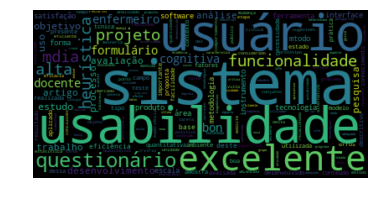

In [62]:
# Etapa 4 - Criação de lista de palavras (Dicionário) a partir da captura (web crawler) dos resumos no idioma português, remoção das stop words, recorrência de cada palavra e desenvolvimento de uma word cloud

import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim
from IPython.display import Image

def getURLBase(string_busca,quantidade_busca, a_partir, numero_pagina):
    return 'http://search.scielo.org/?q={0}&lang=pt&count={1}&from={2}&output=site&format=summary&lang=pt&page={3}' \
           .format(string_busca, str(quantidade_busca), a_partir, numero_pagina)
   

string_busca = "usabilidade"
quantidade_busca = 117
a_partir = 0
resumos = []
contador = 0

for i in range(1, 3):
    base_url = getURLBase(string_busca,quantidade_busca, a_partir, i)
    a_partir += quantidade_busca + 1
    driver = webdriver.Chrome()
    driver.get(base_url)
    bs_obj = bs(driver.page_source,'html.parser')
    driver.close()

    for elemento in bs_obj.findAll ("div", id=lambda x: x and x.endswith('_pt')):
       resumos.append(elemento.text.strip()) 
    
print(resumos)

#print stopwords.nltk

stopwordsnltk = nltk.corpus.stopwords.words('portuguese')

def removestopwords(texto):
    palavras = []
    for (words) in texto:
        words = words.replace(',', '')
        words = words.replace('.', '')
        words = words.replace(':', '')
        words = words.replace(';', '')
        words = words.replace('-', '')
        words = words.replace('(', '')
        words = words.replace(')', '')
        words = words.replace('é', '')
        words = words.lower()
        semstop = [p for p in words.split() if p not in stopwordsnltk]
        palavras.append((semstop))
    return palavras
    
texto_filtrado = removestopwords(resumos)

dictionary = gensim.corpora.Dictionary(texto_filtrado)

print(removestopwords(resumos))

import operator
ordenado = sorted(dictionary.dfs.items(), key=operator.itemgetter(1), reverse=True)
palavras = ""

print("Palavra - Ocorrência")
for item in ordenado:    
    print("{0} - {1}".format(dictionary[item[0]], item[1]))
    palavras += str(dictionary[item[0]])
    palavras += " "   
from wordcloud import WordCloud    

# Generate a word cloud image
wordcloud = WordCloud().generate(palavras)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
